In [1]:
import numpy as np
import cv2
#Import necessary functions
from matplotlib import pyplot as plt
import skimage.io
import skimage.color
from planarH import computeH_ransac, compositeH, computeH_norm
from my_functions import  compositeH_panorama, compositeH_panorama_blend, find_location_relationship, panorama_stitching, find_destination_img
from itertools import permutations

#Write script for Q14
img_dict = {}
img_dict['img1'] = cv2.imread('../data/image1.png')
img_dict['img2'] = cv2.imread('../data/image2.png')
img_dict['img3'] = cv2.imread('../data/image3.png')
img_dict['img4'] = cv2.imread('../data/image4.png')

In [2]:
imgs_dict = find_destination_img(img_dict)

loc_nto1 {'img2': 'bottom', 'img3': 'left', 'img4': 'bottom'}
loc_nto2 {'img1': 'top', 'img3': 'left', 'img4': 'bottom'}
loc_nto3 {'img1': 'right', 'img2': 'right', 'img4': 'right'}
loc_nto4 {'img1': 'top', 'img2': 'top', 'img3': 'left'}


In [3]:
dict_for_counting = {}

for i in imgs_dict.keys():
    dict_for_counting[i] = len(set(imgs_dict[i].values()))

max_value = max(dict_for_counting.values())
for key, value in dict_for_counting.items():
    if value == max_value:
        center_img = key

#center_img = find_key_with_largest_value(dict_for_counting)
print("Center img is", center_img)
for i, j in imgs_dict[center_img].items():
    print(i, "is on", j)

Center img is img2
img1 is on top
img3 is on left
img4 is on bottom


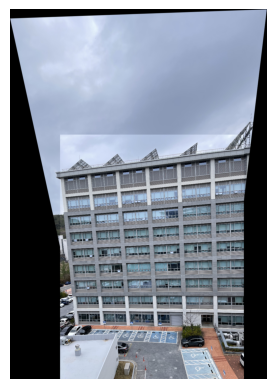

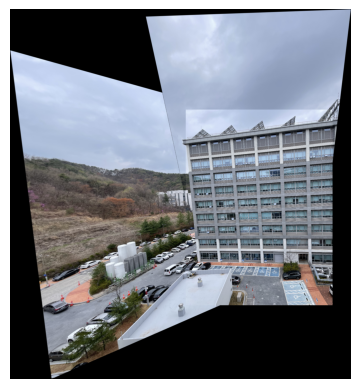

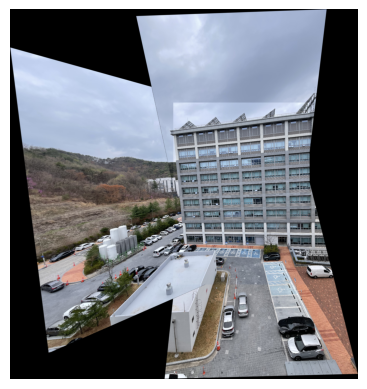

In [4]:
count = 2
for i in imgs_dict[center_img].keys():
    if count == 2:
        panorama = img_dict.get(center_img)
    panorama = panorama_stitching(img_dict.get(i), panorama)
    cv2.imwrite(f'../result/panorama_{count}.png', panorama)
    count += 1

In [ ]:
def loadVid(filename):
    cap = cv2.VideoCapture(filename)
    fps = cap.get(cv2.CAP_PROP_FPS)
    print(fps)
    frames = [] 
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()

    return frames

def create_Video_io(imgList):
    writer = imageio.get_writer('../result/ar.avi', fps=25)

    for i in range(len(imgList)):
        img = imgList[i]
        writer.append_data(img)

    writer.close()
    
    return 0